In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

### 1. Load the dataset and explore the variables.

In [2]:
cust_churn = pd.read_csv('.\\files_for_lab\\customer_churn.csv')
cust_churn.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [3]:
#re.sub(r"(\w)([A-Z])", r"\1_\2", 'SeniorCitizen')
#churn = re.sub('r"(\w)([A-Z])", r"\1_\2"', churn.columns.values())


In [4]:
cols = cust_churn.columns.values
cols2 = []
for i in cols:
    
    i = re.sub(r"(\w)([A-Z])", r"\1_\2", i).lower()
    cols2.append(i)
    
cols2

cust_churn.columns =cols2
cust_churn.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [5]:
cust_churn.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
senior_citizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
phone_service,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
multiple_lines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
internet_service,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
online_security,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [6]:
#cust_churn.dtypes

In [7]:
cust_churn.isna().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [8]:
cust_churn.describe()

,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [9]:
cust_churn.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [10]:
# cust_churn1= cust_churn.drop(['customer_id', 'gender', 'partner', 'dependents',
#         'phone_service', 'multiple_lines', 'internet_service',
#         'online_security', 'online_backup', 'device_protection', 'tech_support',
#         'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
#         'payment_method', 'total_charges', 'churn'], axis = 1 )

In [11]:
# X/y split
# X/y split
#X = diabetes.drop('Outcome',axis = 1)
y = cust_churn['churn']

y = np.where(y == 'Yes', 1, 0)


In [12]:
X = cust_churn.select_dtypes(exclude =['object'])

### 3. Extract the target variable.

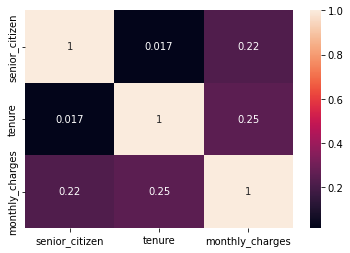

In [14]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [50]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) # default fraction is .2

In [51]:
X_train

,senior_citizen,tenure,monthly_charges
2142,0,21,64.85
1623,0,54,97.20
6074,0,1,23.45
1362,0,4,70.20
6754,0,0,61.90
...,...,...,...
3772,0,1,95.00
5191,0,23,91.10
5226,0,12,21.15
5390,1,12,99.45


In [52]:
X_test

,senior_citizen,tenure,monthly_charges
185,0,1,24.80
2715,0,41,25.25
3825,0,52,19.35
1807,0,1,76.35
132,0,67,50.55
...,...,...,...
6366,0,64,68.30
315,0,51,110.05
2439,0,17,19.90
5002,0,69,43.95


In [53]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [54]:
y_test

array([1, 0, 0, ..., 0, 0, 1])

### 4. Extract the independent variables and scale them.

In [55]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,senior_citizen,tenure,monthly_charges
0,-0.437749,-0.465683,-0.000474
1,-0.437749,0.885537,1.074754
2,-0.437749,-1.284605,-1.376499
3,-0.437749,-1.161766,0.177346
4,-0.437749,-1.325551,-0.098524


In [ ]:
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# # from sklearn.preprocessing import StandardScaler

# X_num = data.select_dtypes(include = np.number)
# X_cat = data.select_dtypes(include = object) # np.object)

# # Scaling data
# transformer = MinMaxScaler().fit(X_num)
# x_normalized = transformer.transform(X_num)
# x_norm = pd.DataFrame(x_normalized)
# x_norm.head()

In [56]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

### 5. Build the logistic regression model.

In [57]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [58]:
LR.predict_proba(X_train_scaled)

array([[0.71368965, 0.28631035],
       [0.84497845, 0.15502155],
       [0.74950804, 0.25049196],
       ...,
       [0.85208683, 0.14791317],
       [0.23246543, 0.76753457],
       [0.9267129 , 0.0732871 ]])

In [59]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

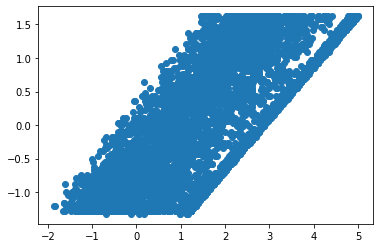

In [60]:
plt.scatter(logits,X_train_scaled['tenure'])

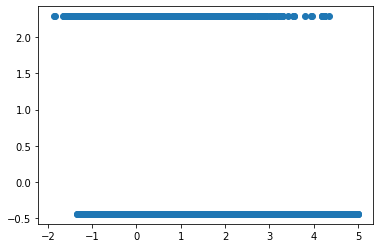

In [61]:
plt.scatter(logits,X_train_scaled['senior_citizen'])

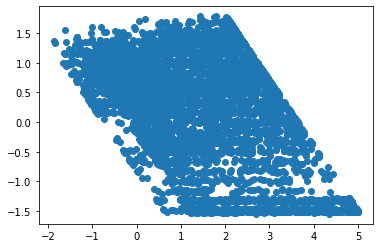

In [62]:
plt.scatter(logits,X_train_scaled['monthly_charges']) 

<AxesSubplot:>

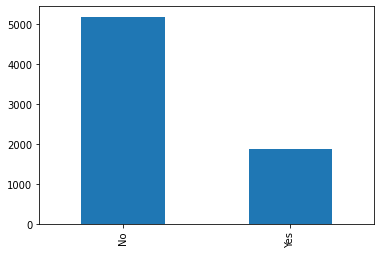

In [63]:
count_classes = cust_churn['churn'].value_counts()
count_classes.plot(kind = 'bar')

In [68]:
false_percentage = 1036/len(y_test)*100
print(round(false_percentage, 2))

73.53


### 6. Evaluate the model.

In [64]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6961538461538461
recall:  0.48525469168900803
f1:  0.5718799368088469


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[957,  79],
       [192, 181]], dtype=int64)

In [66]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.8076650106458482

### 7. Even a simple model will give us more than 70% accuracy. Why?

In [ ]:
# This is due to the imbalance in your our target as we see the that our 73% are falling into one side. This create a bias into pur model to predict on higheer percentile 

### 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [73]:
X_train_SMOTE.shape

(8276, 3)

In [80]:
# yet another small improvement, but bear in mind that we saved 12 hypothetical people with
# these "small improvements"
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs')
#LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred_smote = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5125448028673835
recall:  0.7667560321715817
f1:  0.6143931256713211


In [81]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.8076650106458482

In [77]:
confusion_matrix(y_test,pred)

array([[764, 272],
       [ 87, 286]], dtype=int64)

In [83]:
y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(inplace = True)
y_test_df.drop('index', axis = 1, inplace = True)
predictions_df = pd.DataFrame(pred)
predictions_smote_df = pd.DataFrame(pred_smote)
results = pd.concat([y_test_df, predictions_df, predictions_smote_df], axis = 1)
results.columns = ['y', 'prediction', 'prediction_smote']
results['y'] = np.where(results['y'] == 0, 'No', 'Yes')
results['prediction'] = np.where(results['prediction'] == 0, 'No', 'Yes')
results['prediction_smote'] = np.where(results['prediction_smote'] == 0, 'No', 'Yes')
results
result = pd.concat([X, results], axis = 1)
result


,senior_citizen,tenure,monthly_charges,y,prediction,prediction_smote
0,0,1,29.85,Yes,No,No
1,0,34,56.95,No,No,No
2,0,2,53.85,No,No,No
3,0,45,42.30,Yes,Yes,Yes
4,0,2,70.70,No,No,No
...,...,...,...,...,...,...
7038,0,24,84.80,NaN,NaN,NaN
7039,0,72,103.20,NaN,NaN,NaN
7040,0,11,29.60,NaN,NaN,NaN
7041,1,4,74.40,NaN,NaN,NaN
